In [2]:
import pandas
df = pandas.read_csv('training_results.csv')
df.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,0.82228,3.5357,1.4020,0.01154,0.99098,0.20773,0.15448,0.53053,3.3817,1.1995,0.070556,0.003272,0.003272
1,1,0.72319,2.9745,1.3030,0.34067,0.54524,0.25682,0.18886,0.79827,2.7960,1.5522,0.040490,0.006540,0.006540
2,2,0.74863,2.5699,1.3086,0.26528,0.61527,0.34940,0.21690,1.06840,2.8688,2.0052,0.010359,0.009742,0.009742
3,3,0.77363,2.3731,1.3135,0.18305,0.53949,0.29757,0.21834,1.02550,2.6554,1.9015,0.009703,0.009703,0.009703
4,4,0.80172,2.2281,1.3264,0.28365,0.47162,0.34933,0.22210,1.14110,2.7824,1.9504,0.009703,0.009703,0.009703


In [13]:
df.columns = df.columns.str.strip()
df.columns

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

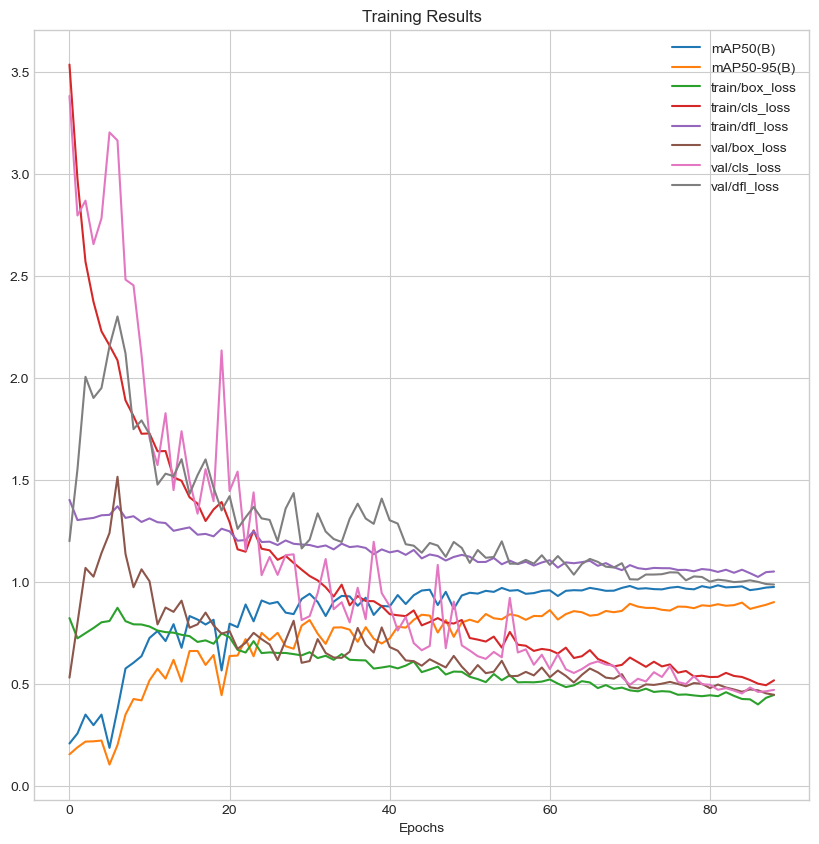

In [11]:
import matplotlib.pyplot as plt

# plot the training results
plt.figure(figsize=(10, 10))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50(B)')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95(B)')
plt.plot(df['epoch'], df['train/box_loss'], label='train/box_loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
plt.plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
plt.plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
plt.legend()
plt.xlabel('Epochs')
plt.title('Training Results')
plt.show()



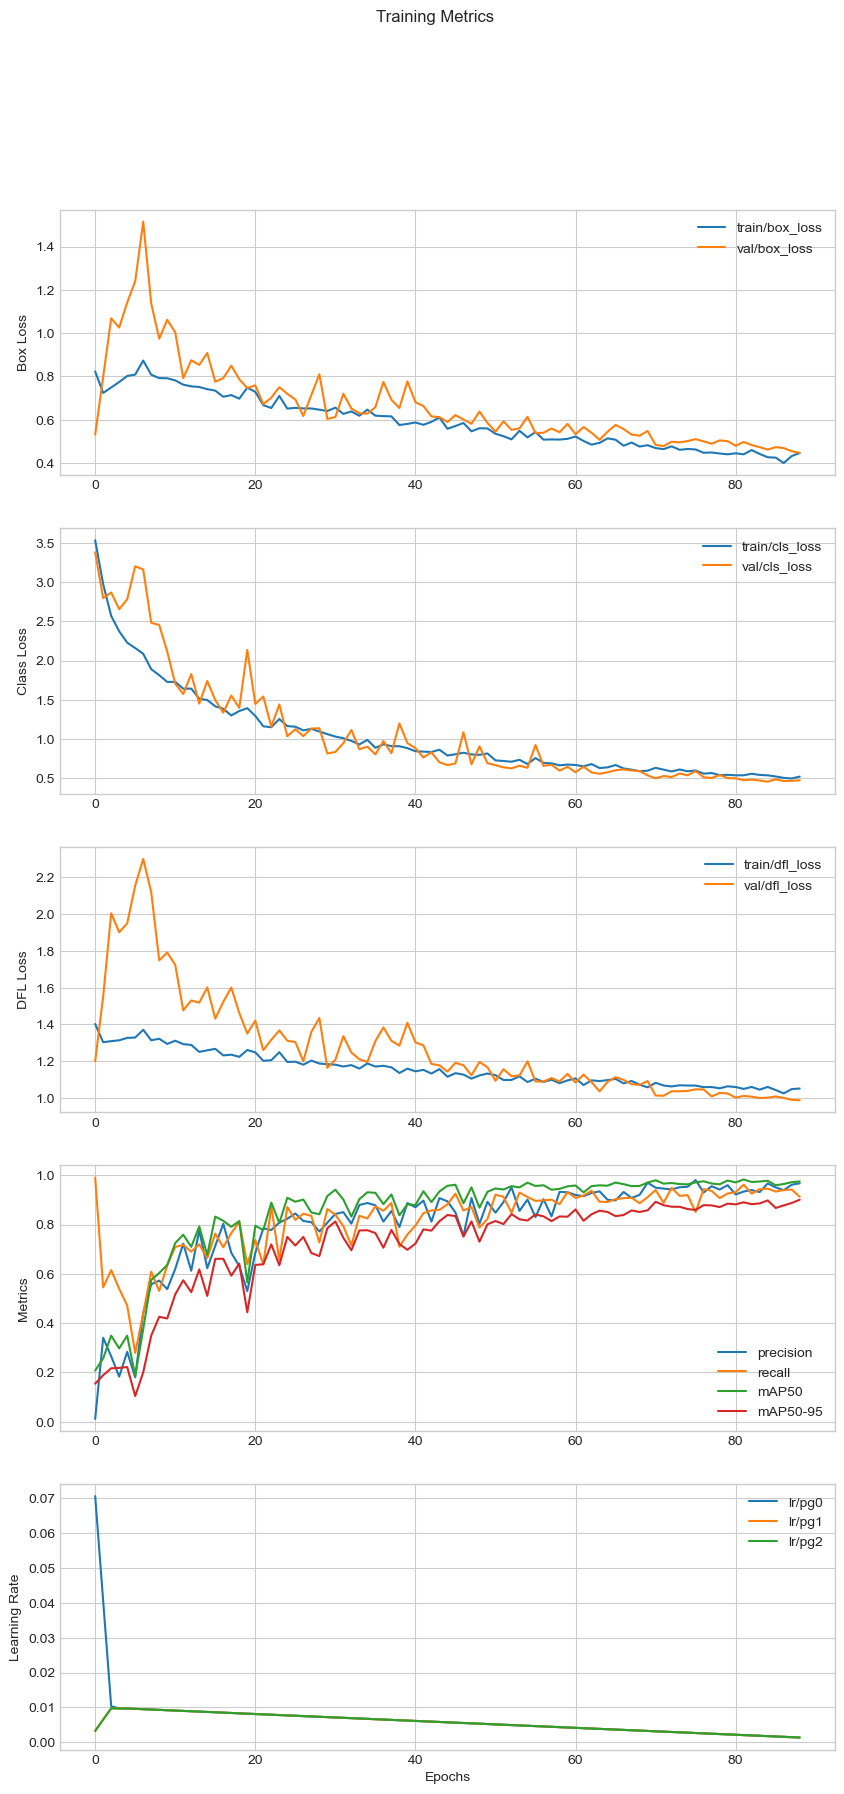

In [12]:
epochs = df['epoch']
train_box_loss = df['train/box_loss']
train_cls_loss = df['train/cls_loss']
train_dfl_loss = df['train/dfl_loss']
precision = df['metrics/precision(B)']
recall = df['metrics/recall(B)']
mAP50 = df['metrics/mAP50(B)']
mAP50_95 = df['metrics/mAP50-95(B)']
val_box_loss = df['val/box_loss']
val_cls_loss = df['val/cls_loss']
val_dfl_loss = df['val/dfl_loss']
lr_pg0 = df['lr/pg0']
lr_pg1 = df['lr/pg1']
lr_pg2 = df['lr/pg2']

# Create subplots for each metric
fig, axs = plt.subplots(5, 1, figsize=(10, 20))
fig.suptitle('Training Metrics')

# Plot the metrics on their respective subplots
axs[0].plot(epochs, train_box_loss, label='train/box_loss')
axs[0].plot(epochs, val_box_loss, label='val/box_loss')
axs[0].legend()
axs[0].set_ylabel('Box Loss')

axs[1].plot(epochs, train_cls_loss, label='train/cls_loss')
axs[1].plot(epochs, val_cls_loss, label='val/cls_loss')
axs[1].legend()
axs[1].set_ylabel('Class Loss')

axs[2].plot(epochs, train_dfl_loss, label='train/dfl_loss')
axs[2].plot(epochs, val_dfl_loss, label='val/dfl_loss')
axs[2].legend()
axs[2].set_ylabel('DFL Loss')

axs[3].plot(epochs, precision, label='precision')
axs[3].plot(epochs, recall, label='recall')
axs[3].plot(epochs, mAP50, label='mAP50')
axs[3].plot(epochs, mAP50_95, label='mAP50-95')
axs[3].legend()
axs[3].set_ylabel('Metrics')

axs[4].plot(epochs, lr_pg0, label='lr/pg0')
axs[4].plot(epochs, lr_pg1, label='lr/pg1')
axs[4].plot(epochs, lr_pg2, label='lr/pg2')
axs[4].legend()
axs[4].set_ylabel('Learning Rate')
axs[4].set_xlabel('Epochs')

plt.show()


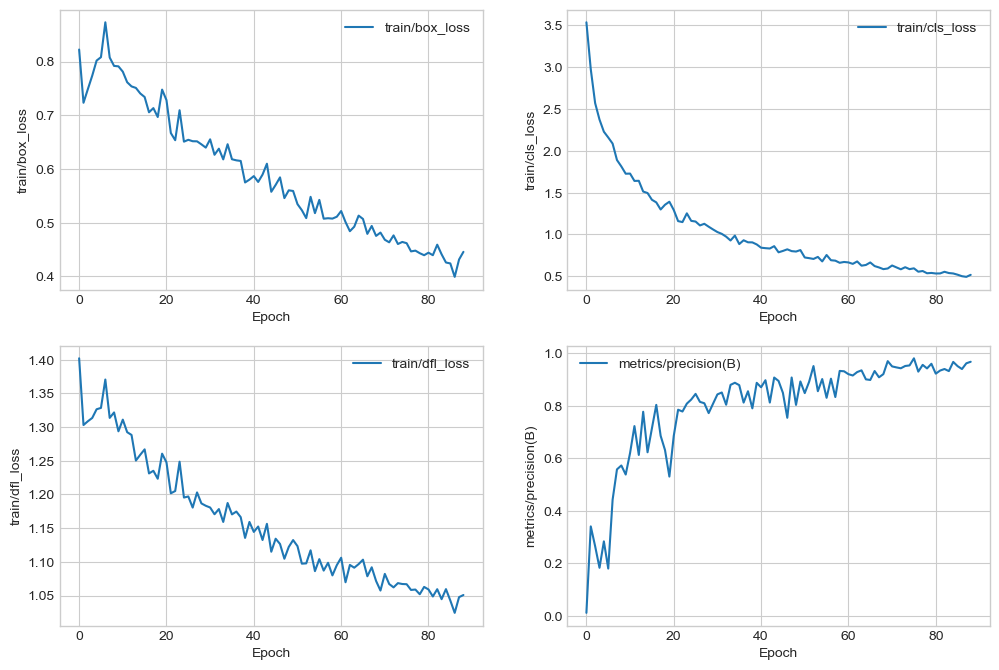

In [17]:
columns = ['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
           'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
           'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
           'lr/pg0', 'lr/pg1', 'lr/pg2']

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axes = axs.flatten()

# Loop through the columns and plots
for i in range(4):
    col = columns[i+1]
    axes[i].plot(df['epoch'], df[col], label=col)
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel(col)
    axes[i].legend()

# Show the plot
plt.show()